## Data Collection & data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("chicago_cleaned_data.csv")
df.head()

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_14652\4128814391.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("chicago_cleaned_data.csv")


,pin,tax_year,card_num,class,township_code,pin_proration_rate,card_proration_rate,cdu,pin_is_multicard,pin_num_cards,...,repair_condition,basement_finish,roof_material,single_v_multi_family,site_desirability,num_commercial_units,renovation,recent_renovation,central_air,design_plan
0,9364050130000,1999,1,204,71.0,1.0,0.0,AV,False,1,...,Average,Unfinished,Shingle + Asphalt,Single-Family,Not Relevant To Value,0.0,No,False,Central A/C,Unknown
1,9364050130000,2000,1,204,71.0,1.0,0.0,AV,False,1,...,Average,Unfinished,Shingle + Asphalt,Single-Family,Not Relevant To Value,0.0,No,False,Central A/C,Unknown
2,9364050130000,2001,1,204,71.0,1.0,0.0,AV,False,1,...,Average,Unfinished,Shingle + Asphalt,Single-Family,Not Relevant To Value,0.0,No,False,Central A/C,Unknown
3,9364050130000,2002,1,204,71.0,1.0,0.0,AV,False,1,...,Average,Unfinished,Shingle + Asphalt,Single-Family,Not Relevant To Value,0.0,No,False,Central A/C,Unknown
4,9364050130000,2003,1,204,71.0,1.0,0.0,AV,False,1,...,Average,Unfinished,Shingle + Asphalt,Single-Family,Not Relevant To Value,0.0,No,False,Central A/C,Unknown


In [3]:
df.shape

(7612130, 38)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7612130 entries, 0 to 7612129
Data columns (total 38 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   pin                       int64  
 1   tax_year                  int64  
 2   card_num                  int64  
 3   class                     object 
 4   township_code             float64
 5   pin_proration_rate        float64
 6   card_proration_rate       float64
 7   cdu                       object 
 8   pin_is_multicard          bool   
 9   pin_num_cards             int64  
 10  pin_is_multiland          bool   
 11  pin_num_landlines         float64
 12  year_built                float64
 13  building_sqft             float64
 14  land_sqft                 float64
 15  num_bedrooms              float64
 16  num_rooms                 float64
 17  num_full_baths            float64
 18  num_half_baths            float64
 19  num_fireplaces            float64
 20  type_of_residence       

In [5]:
df.describe()

,pin,tax_year,card_num,township_code,pin_proration_rate,card_proration_rate,pin_num_cards,pin_num_landlines,year_built,building_sqft,land_sqft,num_bedrooms,num_rooms,num_full_baths,num_half_baths,num_fireplaces,num_commercial_units
count,7.612130e+06,7.612130e+06,7612130.0,7.612130e+06,7.612130e+06,7.612130e+06,7.612130e+06,7.612130e+06,7.612130e+06,7.612130e+06,7.612130e+06,7.612130e+06,7.612130e+06,7.612130e+06,7.612130e+06,7.612130e+06,7.612130e+06
mean,1.882110e+13,2.011490e+03,1.0,7.182254e+01,9.879168e-01,1.171459e-02,1.015692e+00,1.010621e+00,1.933803e+03,1.627133e+03,4.027773e+03,3.460509e+00,6.785843e+00,1.549958e+00,2.568441e-01,1.130291e-01,1.429009e-02
std,4.852193e+12,7.490850e+00,0.0,1.697697e+00,7.503540e-02,7.351209e-02,1.242822e-01,1.025092e-01,2.662605e+01,9.339137e+02,1.134225e+03,1.472604e+00,3.260810e+00,8.627674e-01,4.761743e-01,3.724221e-01,1.186840e-01
min,9.364050e+12,1.999000e+03,1.0,7.000000e+01,5.000000e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.882000e+03,6.400000e+02,1.667000e+03,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.331320e+13,2.005000e+03,1.0,7.100000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.913000e+03,1.040000e+03,3.660000e+03,3.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.922306e+13,2.011000e+03,1.0,7.200000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.930000e+03,1.285000e+03,3.750000e+03,3.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.414304e+13,2.018000e+03,1.0,7.200000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.954000e+03,1.952000e+03,4.195000e+03,4.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.620116e+13,2.024000e+03,1.0,7.700000e+01,1.000000e+00,5.000000e-01,2.000000e+00,2.000000e+00,2.005000e+03,6.006000e+03,9.247000e+03,1.000000e+01,2.200000e+01,6.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00


In [6]:
df.isnull().sum()

pin                         0
tax_year                    0
card_num                    0
class                       0
township_code               0
pin_proration_rate          0
card_proration_rate         0
cdu                         0
pin_is_multicard            0
pin_num_cards               0
pin_is_multiland            0
pin_num_landlines           0
year_built                  0
building_sqft               0
land_sqft                   0
num_bedrooms                0
num_rooms                   0
num_full_baths              0
num_half_baths              0
num_fireplaces              0
type_of_residence           0
construction_quality        0
garage_attached             0
garage_size                 0
garage_ext_wall_material    0
basement_type               0
ext_wall_material           0
central_heating             0
repair_condition            0
basement_finish             0
roof_material               0
single_v_multi_family       0
site_desirability           0
num_commer

In [7]:
df["township_code"].value_counts()

72.0    3591662
71.0    1953432
70.0    1327038
77.0     500384
75.0     203687
76.0      35927
Name: township_code, dtype: int64

##  Univariate Analysis

In [8]:
# Summary of categorical variables
df.describe(include='object')


,class,cdu,type_of_residence,construction_quality,garage_attached,garage_size,garage_ext_wall_material,basement_type,ext_wall_material,central_heating,repair_condition,basement_finish,roof_material,single_v_multi_family,site_desirability,renovation,central_air,design_plan
count,7612130,7612130,7612130,7612130,7612130,7612130,7612130,7612130,7612130,7612130,7612130,7612130,7612130,7612130,7612130,7612130,7612130,7612130
unique,49,7,6,3,3,9,5,5,5,4,4,4,7,3,4,3,3,3
top,203,AV,1 Story,Average,No,2 cars,Frame,Full,Masonry,Warm Air Furnace,Average,Unfinished,Shingle + Asphalt,Single-Family,Not Relevant To Value,No,No Central A/C,Stock Plan
freq,2026966,7573422,3496609,7592186,7281010,3538147,4676436,5446770,4433392,5839625,7523213,5670816,6725812,5717322,7547158,7577163,5918929,4226662


### Visualizing Numeric Features

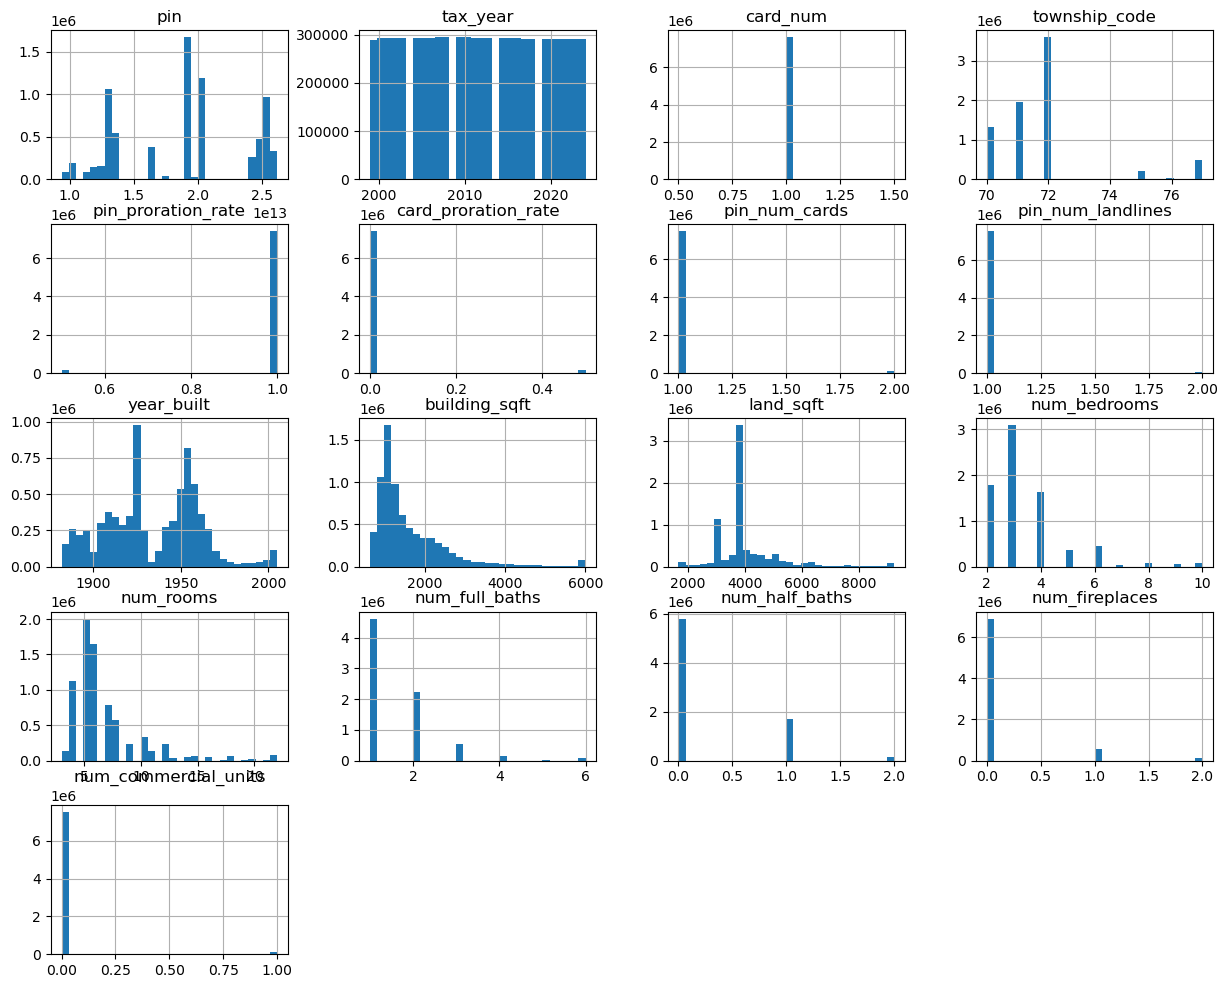

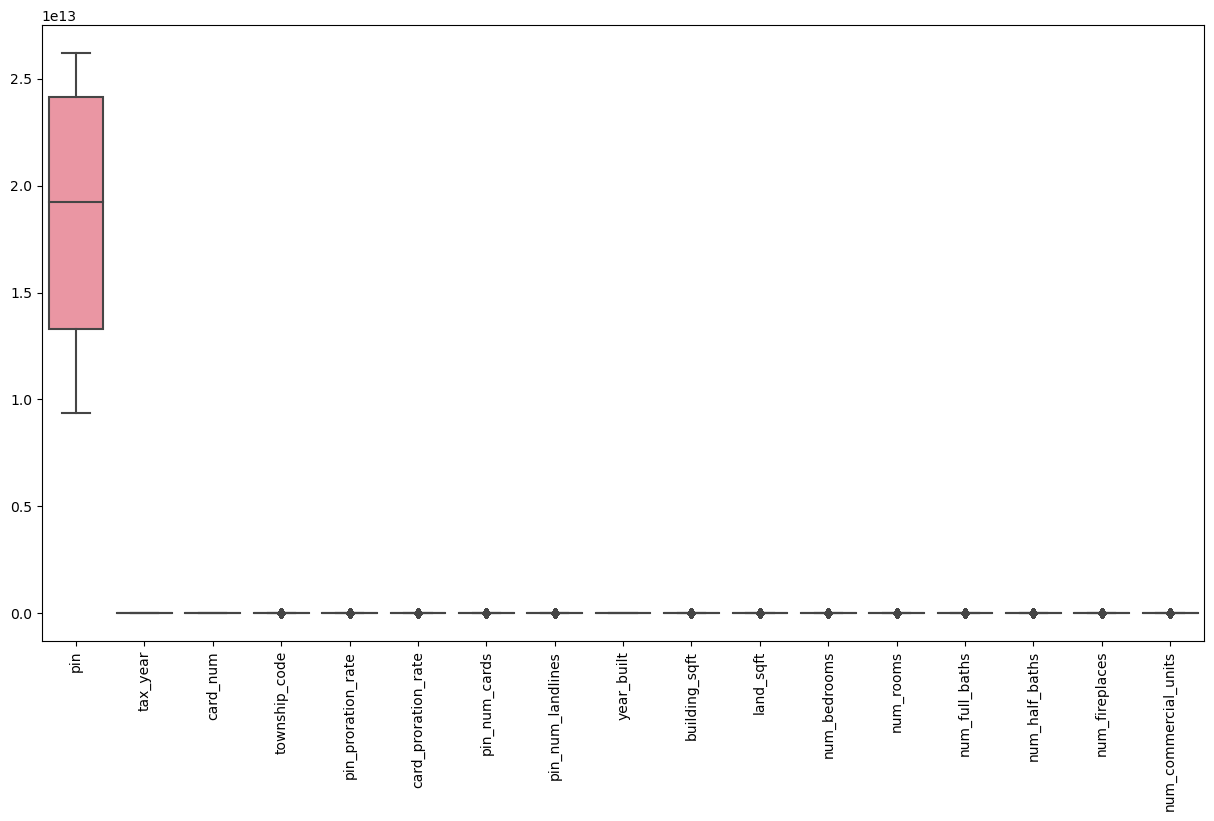

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
df.hist(figsize=(15, 12), bins=30)
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()


## Property Characteristics Analysis

### Building Features

Text(0.5, 1.0, 'Distribution of Building Sizes')

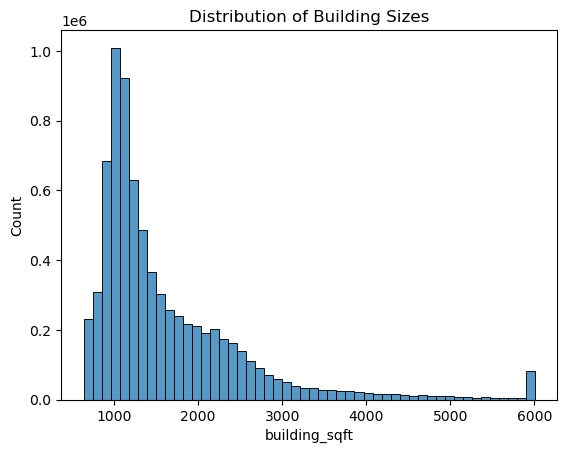

In [10]:
# Basic statistics for numerical features
df[['building_sqft', 'land_sqft', 'num_bedrooms', 'num_rooms']].describe()

# Distribution plots
sns.histplot(data=df, x='building_sqft', bins=50)
plt.title('Distribution of Building Sizes')


- Most buildings are between 1,000-2,000 square feet, with the peak around 1,000 sq ft
- Nearly 45% of properties are 1-story buildings, followed by 35% 2-story properties
- The majority of homes have 2-4 bedrooms
- Most properties have 1-2 full bathrooms

Text(0.5, 1.0, 'Property Type Distribution (%)')

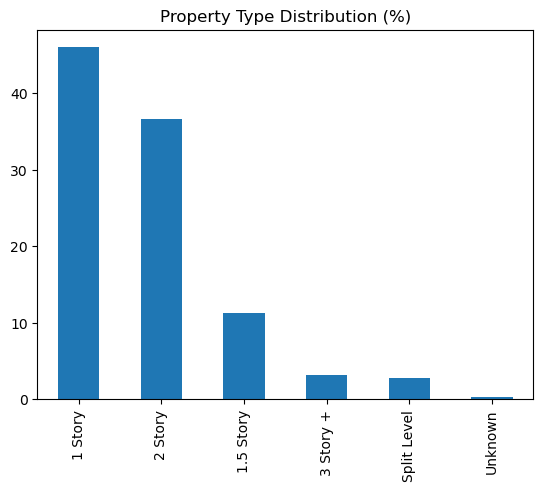

In [11]:
# Property type analysis with percentages
type_dist = df['type_of_residence'].value_counts(normalize=True) * 100
type_dist.plot(kind='bar')
plt.title('Property Type Distribution (%)')


The bar chart displays the distribution of property types by number of stories. Single-story properties form the largest segment at 45%, followed by two-story buildings at 37%. The remaining categories show significantly smaller percentages, with 1.5-story homes at 11%, and both 3+ story and split-level properties representing less than 5% each. Unknown property types make up a negligible portion at less than 1%.


In [20]:
# Average building size by decade
df['decade_built'] = (df['year_built'] // 10) * 10
decade_avg = df.groupby('decade_built')['building_sqft'].mean()
print(decade_avg)

decade_built
1880.0    1810.444909
1890.0    1923.385293
1900.0    1997.446734
1910.0    1888.392069
1920.0    1751.113193
1930.0    1741.272472
1940.0    1279.662073
1950.0    1297.113098
1960.0    1399.250645
1970.0    1581.921995
1980.0    1786.456116
1990.0    1918.387934
2000.0    2307.613338
Name: building_sqft, dtype: float64


- Average building sizes fluctuated between 1,200-2,300 sq ft from 1880-2000
- Largest homes (2,307 sq ft) were built in the 2000s
- Smallest homes (1,279 sq ft) were built in the 1940s
- Notable dip in size during 1930s-1950s, likely due to post-war construction


<Axes: xlabel='recent_renovation', ylabel='year_built'>

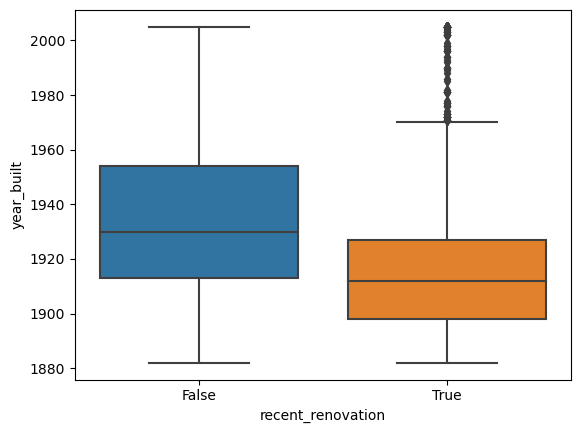

In [13]:
# Analyze renovation status by age
sns.boxplot(x='recent_renovation', y='year_built', data=df)


- Properties with recent renovations (True) have a median construction year around 1915
- Non-renovated properties (False) have a median year around 1930
- Both categories show outliers extending to 2000s
- Renovated properties show more concentrated distribution

In [19]:
# Property characteristics by township
township_stats = df.groupby('township_code').agg({
    'building_sqft': 'mean',
    'num_bedrooms': 'mean',
    'central_air': lambda x: (x == 'Y').mean() * 100
})
print(township_stats)

               building_sqft  num_bedrooms  central_air
township_code                                          
70.0             1732.585907      3.685527          0.0
71.0             1710.919727      3.507820          0.0
72.0             1429.307416      3.187607          0.0
75.0             2264.562014      4.297648          0.0
76.0             2326.420881      4.361511          0.0
77.0             2130.648236      4.232443          0.0


- Townships 75-77 have larger homes (2,100-2,326 sq ft)
- Townships 70-72 have smaller homes (1,429-1,732 sq ft)
- Average bedrooms range from 3.2 to 4.4
- Notably, central air conditioning is absent (0%) across all townships

<Axes: >

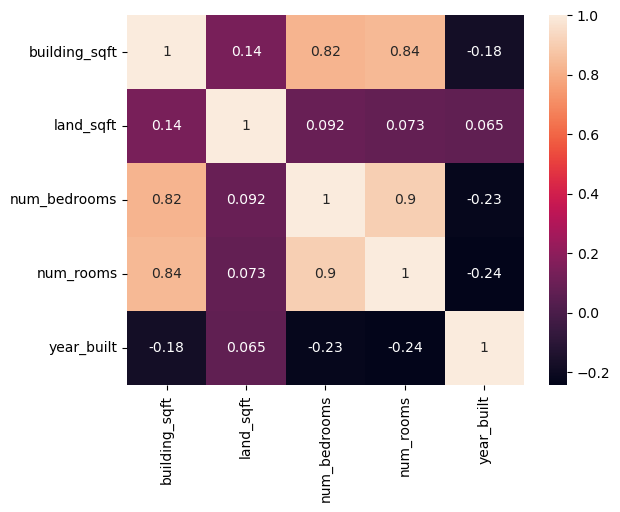

In [15]:
# Correlation matrix for numerical features
corr_vars = ['building_sqft', 'land_sqft', 'num_bedrooms', 'num_rooms', 'year_built']
sns.heatmap(df[corr_vars].corr(), annot=True)


### Strong positive correlations between:
- Building sqft and number of rooms (0.84)
- Building sqft and number of bedrooms (0.82)
- Number of rooms and bedrooms (0.90)

### Weak negative correlations with year built:
- Rooms (-0.24)
- Bedrooms (-0.23)
- Building sqft (-0.18)

- Land sqft shows weak correlations with all variables (0.065-0.14)

In [18]:
# Cross-tabulation of amenities
amenities_dist = pd.crosstab([df['central_air']], [df['basement_finish']])
amenities_dist


basement_finish,Apartment,Formal Rec Room,Unfinished,Unknown
central_air,,,,
Central A/C,20849,651425,1000376,399
No Central A/C,140389,1107870,4670435,235
Unknown,4,20,5,20123


### Properties WITHOUT Central A/C:
- Have more formal recreation rooms (1,107,870 units)
- Have significantly more unfinished basements (4,670,435 units)
- Suggests these are likely older properties that haven't been fully modernized

### Properties WITH Central A/C:
- Have fewer formal recreation rooms (651,425 units)
- Have fewer unfinished basements (1,000,376 units)
- Indicates these might be newer or more recently renovated properties

### Visualizing Categorical Features

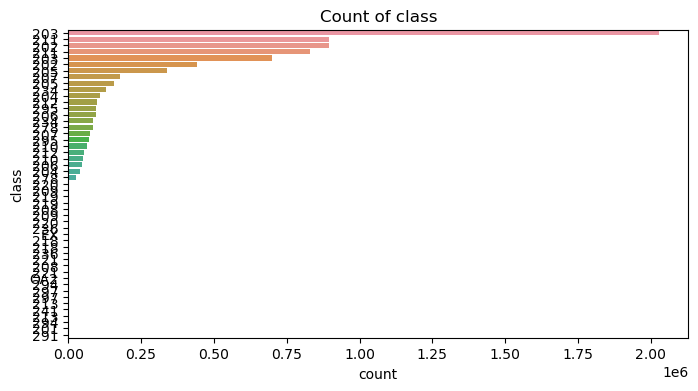

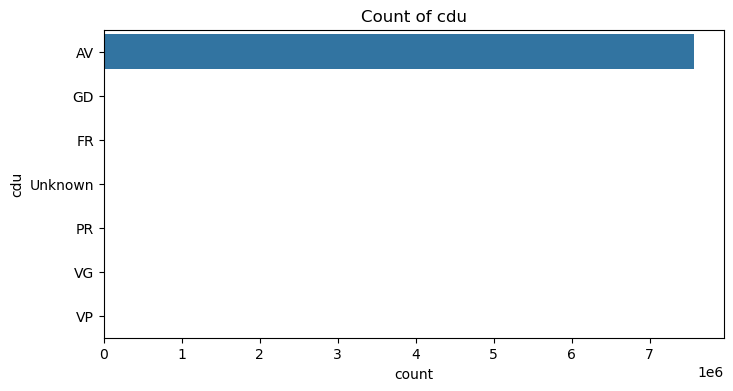

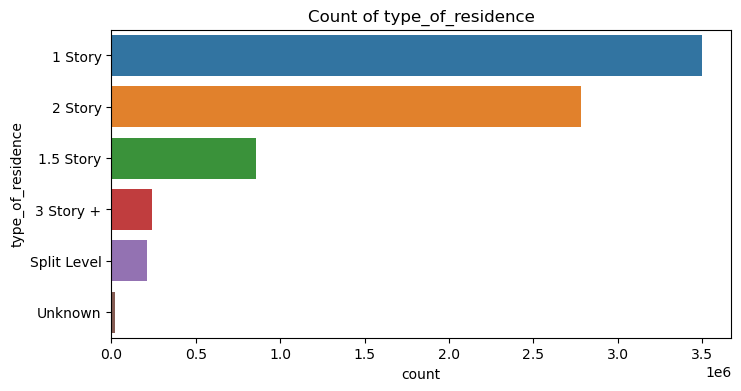

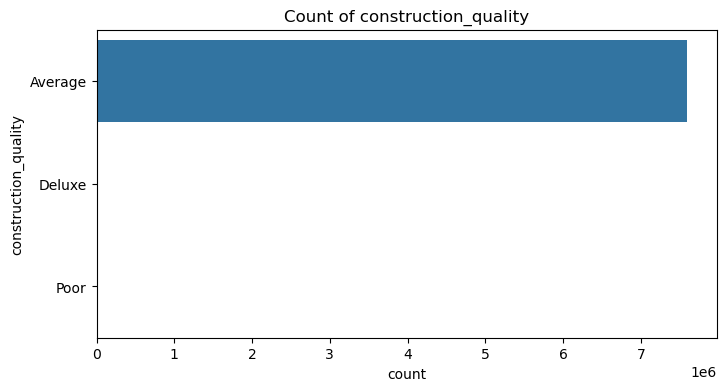

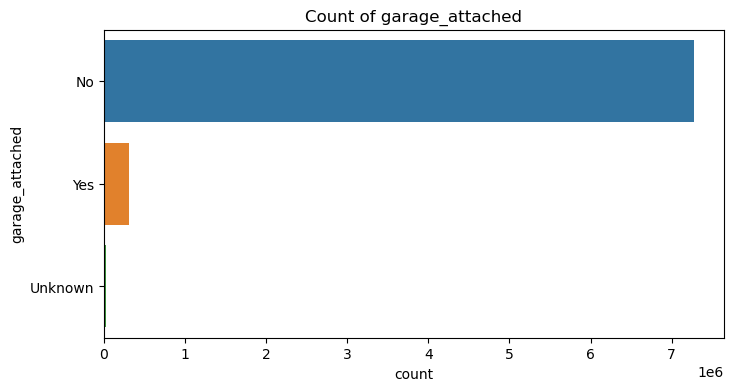

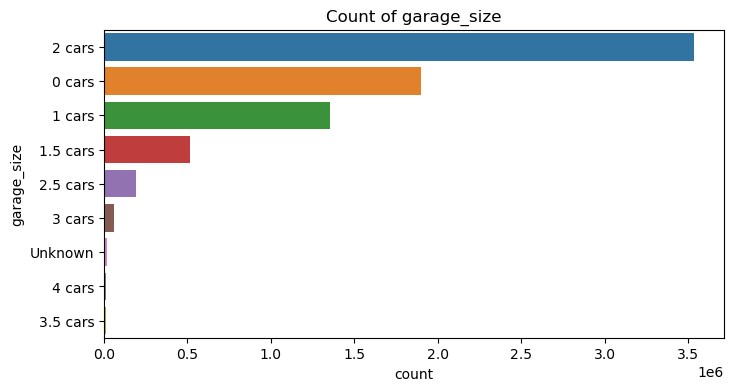

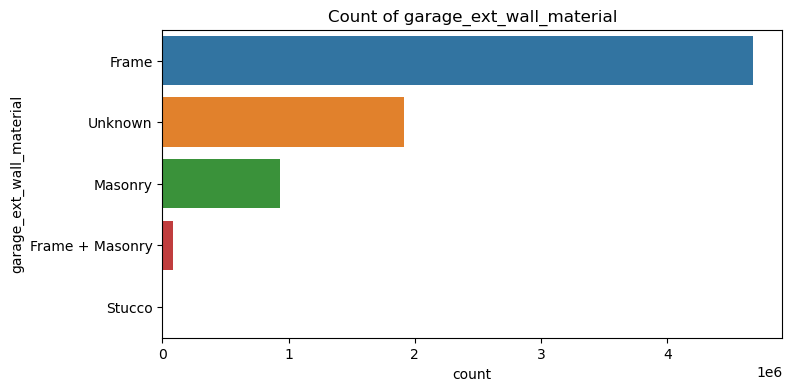

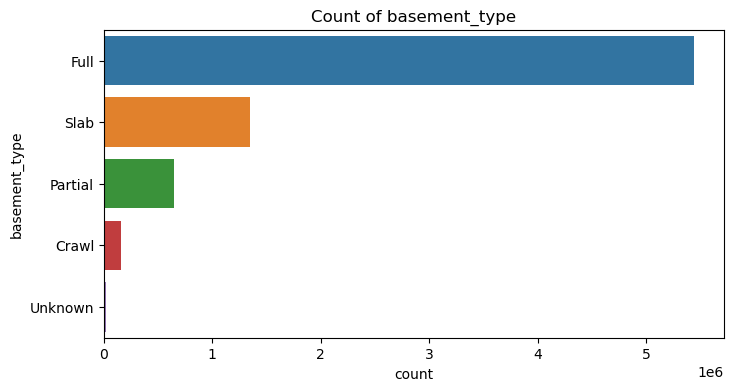

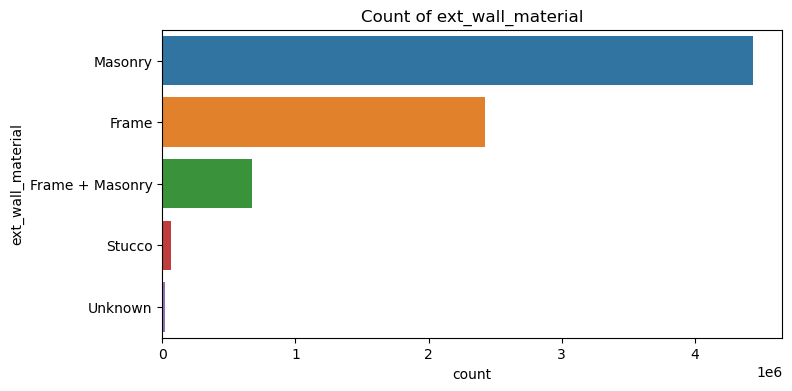

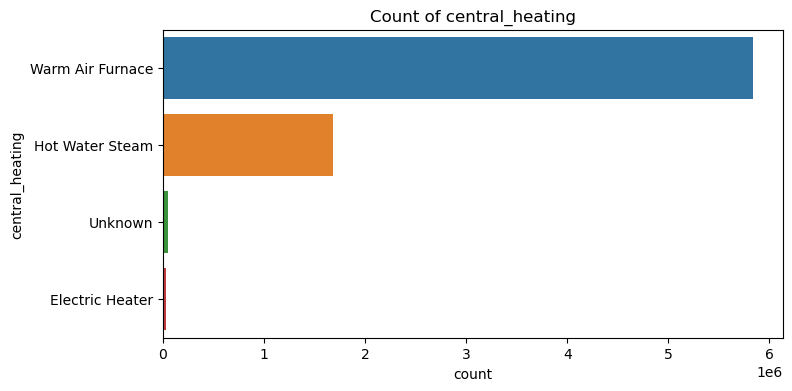

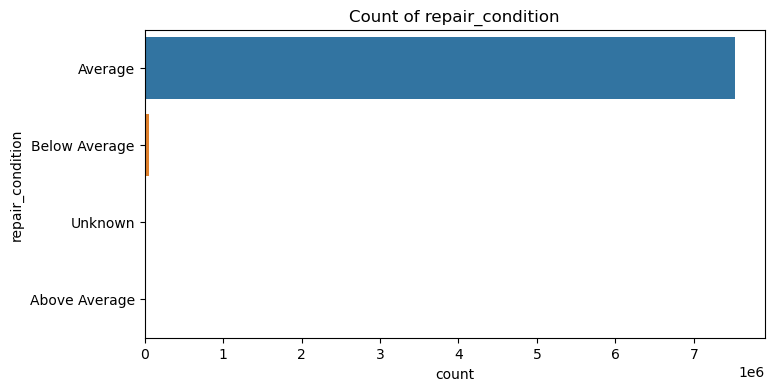

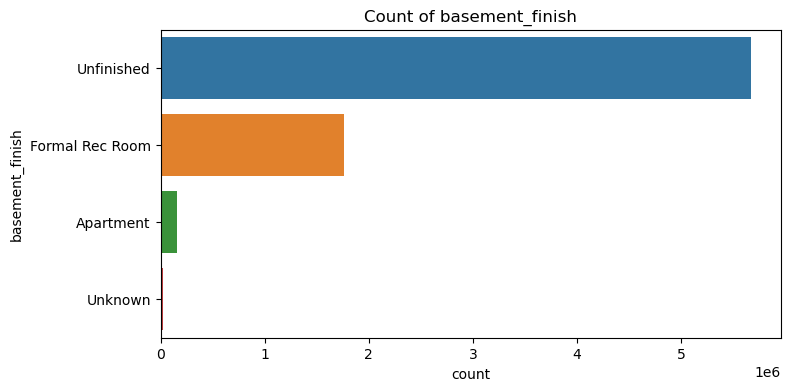

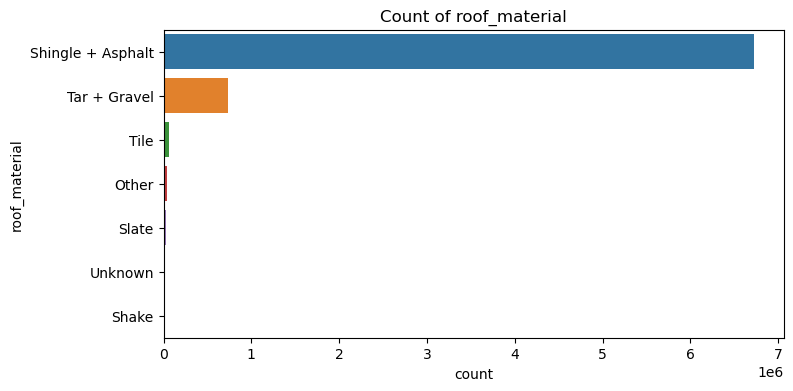

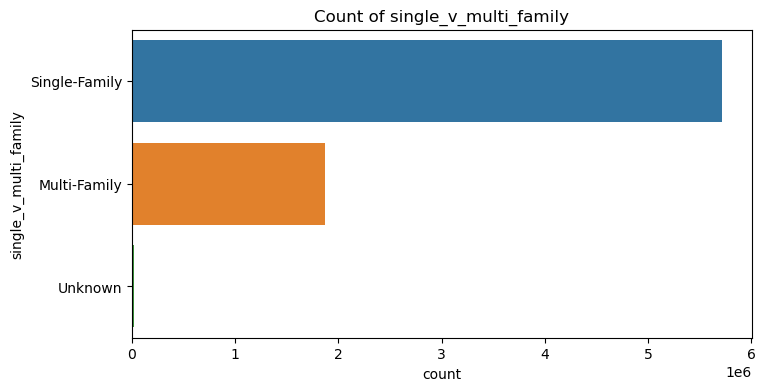

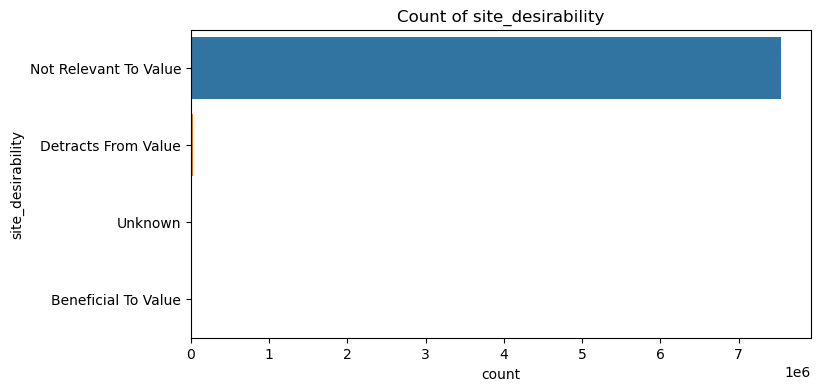

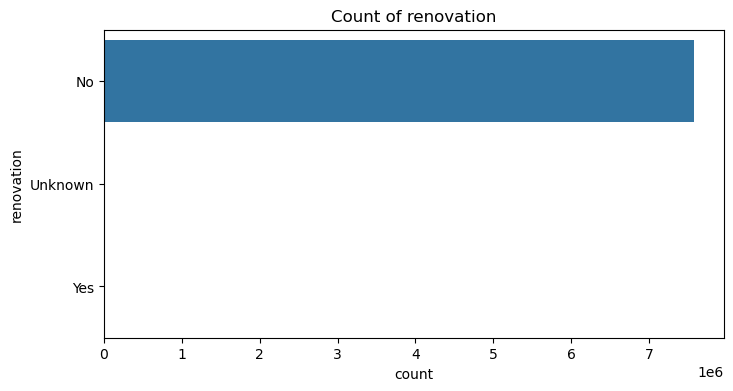

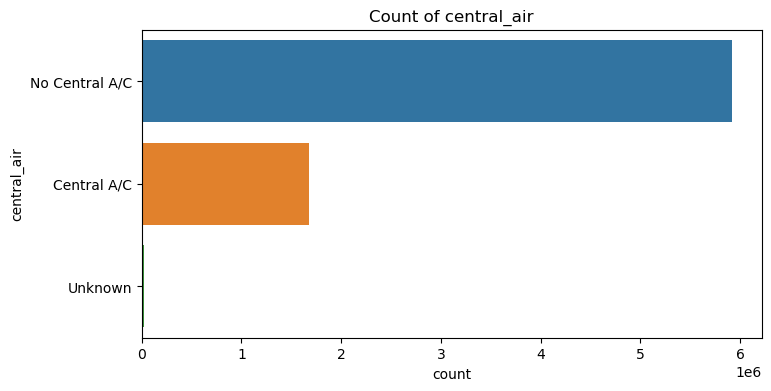

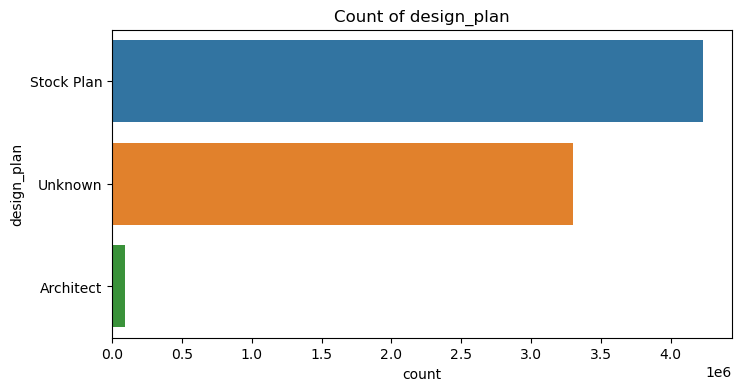

In [17]:
# Count plots for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()


## Bivariate Analysis (Relationships Between Two Variables)

Text(0.5, 1.0, 'Building Size vs Land Size')

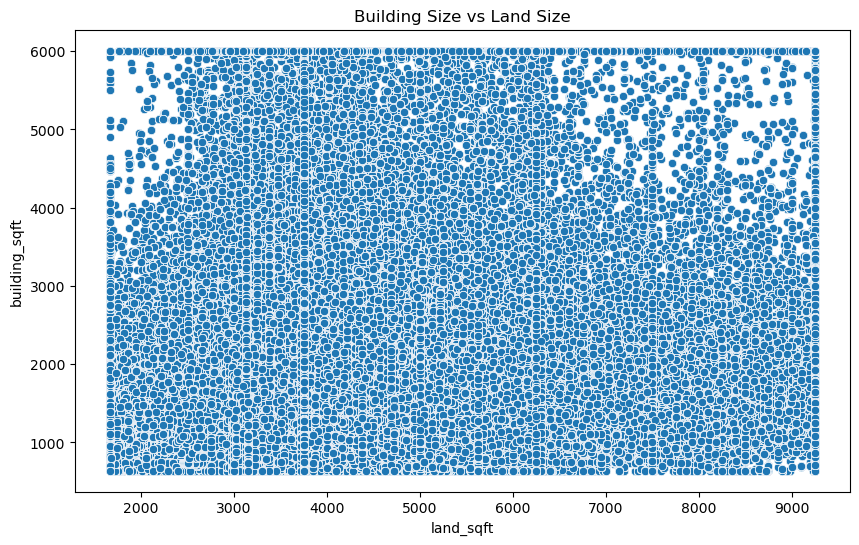

In [21]:
# Building vs Land Square Footage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='land_sqft', y='building_sqft')
plt.title('Building Size vs Land Size')


- Building sizes range from ~600 to 6,000 sqft
- Most properties cluster between 1,000-3,000 sqft
- Land sizes typically range from 2,000-9,000 sqft
- No strong linear relationship between land and building size

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1 Story'),
  Text(1, 0, '2 Story'),
  Text(2, 0, 'Split Level'),
  Text(3, 0, '1.5 Story'),
  Text(4, 0, '3 Story +'),
  Text(5, 0, 'Unknown')])

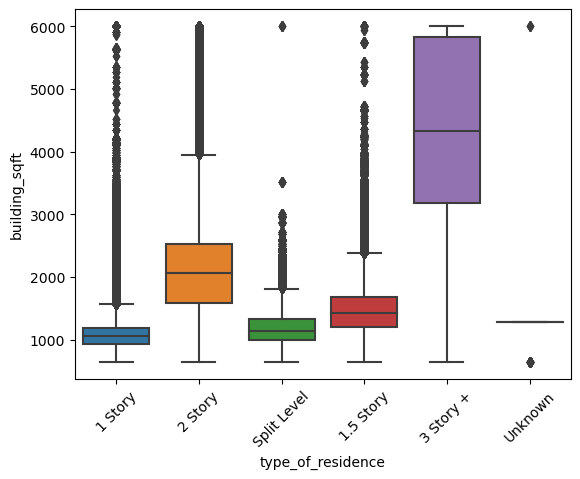

In [22]:
# Building size by property type
sns.boxplot(data=df, x='type_of_residence', y='building_sqft')
plt.xticks(rotation=45)


- 3 Story+ buildings show largest size variation (3,000-6,000 sqft)
- 1 Story homes are most consistent in size (800-1,200 sqft)
- 2 Story homes show moderate variation (1,500-2,500 sqft)
- Split Level and 1.5 Story homes show similar size ranges

<Axes: xlabel='decade_built', ylabel='building_sqft'>

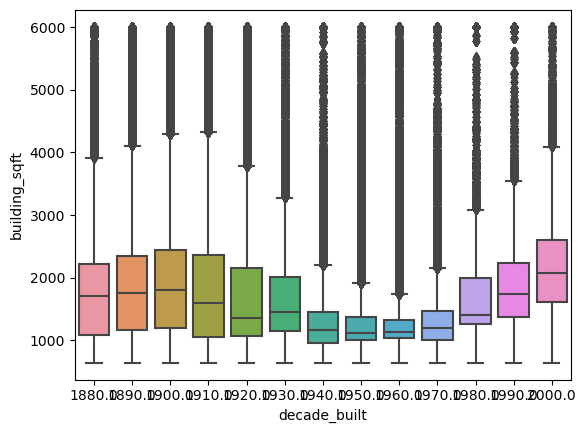

In [23]:
# Building size by construction decade
sns.boxplot(data=df, x='decade_built', y='building_sqft')


- Building sizes show a U-shaped trend from 1880 to 2000
- Smallest homes were built in the 1940s-1950s (median around 1,200 sq ft)
- Recent decades (1990-2000) show larger homes (median around 2,000-2,500 sq ft)
- Older homes (1880-1900) were relatively large (median around 1,800-2,000 sq ft)
- Consistent outliers appear across all decades, reaching up to 6,000 sq ft

<Axes: xlabel='central_air', ylabel='building_sqft'>

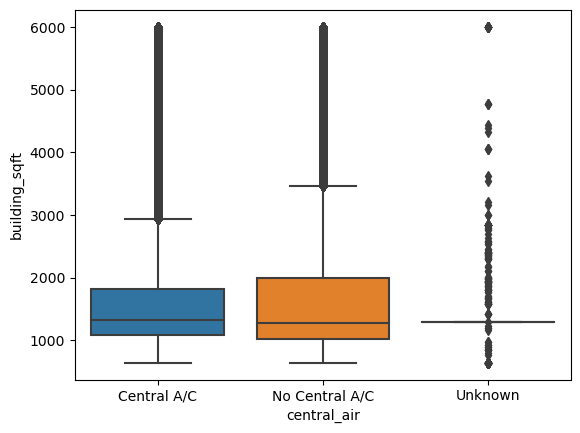

In [24]:
# Building size by central air
sns.boxplot(data=df, x='central_air', y='building_sqft')


- Properties with central A/C have median size around 1,300 sq ft
- Properties without central A/C have slightly larger median size around 1,400 sq ft
- Both categories show similar spread in building sizes
- "Unknown" category shows more outliers and greater variability

<Axes: xlabel='num_bedrooms', ylabel='num_rooms'>

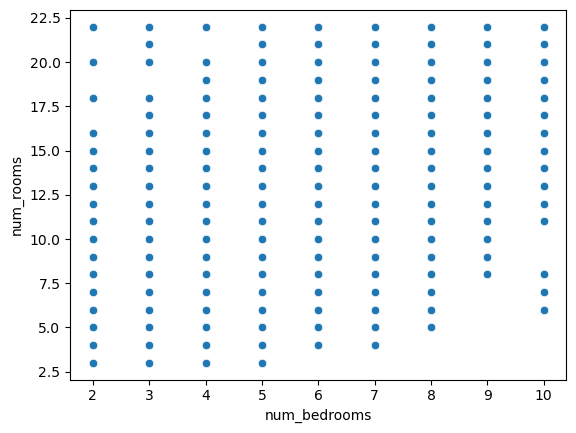

In [25]:
# Number of bedrooms vs total rooms
sns.scatterplot(data=df, x='num_bedrooms', y='num_rooms')


- Strong correlation between number of bedrooms and total rooms
- Bedroom count ranges from 2-10
- Total room count ranges from 2.5-22.5
#### Most common configurations cluster between:
- 3-5 bedrooms
- 7-15 total rooms

- Consistent pattern of dots suggests standardized room layouts across properties